In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jinja2 import Environment, FileSystemLoader, Template
import datetime
import sqlalchemy
from sqlalchemy import create_engine
from json import load

In [2]:
fichierConfig = "config.json"

with open(fichierConfig) as fichier:
    config = load(fichier)["mysql"]
    
engine = create_engine('mysql+' + config["connector"] + '://' + config["user"] + ":" + config["password"] + "@" + config["host"] + ":" + config["port"] + "/" + config["bdd"], echo=True)

In [3]:
realisateur = input('Entrez un nom de réalisateur: ')
realisateur

'Jan Suter'

In [4]:
requeteRealisateur = """
SELECT * FROM catalog 
	JOIN catalog_director ON catalog_director.show_id = catalog.show_id
	JOIN director ON catalog_director.director_id = director.director_id
    JOIN catalog_actor ON catalog_actor.show_id = catalog.show_id
    JOIN actor ON catalog_actor.actor_id = actor.actor_id
    JOIN catalog_country ON catalog_country.show_id = catalog.show_id
    JOIN country ON country.country_id = catalog_country.country_id
    JOIN catalog_category ON catalog_category.show_id = catalog.show_id
    JOIN category ON category.category_id = catalog_category.category_id
	WHERE director_name = "%s";
    """%(realisateur)

In [5]:
dataRealisateur = pd.read_sql_query(requeteRealisateur, engine)
dataRealisateur

2020-12-26 00:15:12,271 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2020-12-26 00:15:12,272 INFO sqlalchemy.engine.base.Engine {}
2020-12-26 00:15:12,276 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'lower_case_table_names'
2020-12-26 00:15:12,277 INFO sqlalchemy.engine.base.Engine {}
2020-12-26 00:15:12,281 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2020-12-26 00:15:12,282 INFO sqlalchemy.engine.base.Engine {}
2020-12-26 00:15:12,284 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2020-12-26 00:15:12,285 INFO sqlalchemy.engine.base.Engine {}
2020-12-26 00:15:12,287 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2020-12-26 00:15:12,287 INFO sqlalchemy.engine.base.Engine {}
2020-12-26 00:15:12,289 INFO sqlalchemy.engine.base.OptionEngine 
SELECT * FROM catalog 
	JOIN catalog_director ON catalog_director.show_id = catalog.show_id
	JOIN director ON catalog_dir

,show_id,type,title,date_added,release_year,rating,duration,description,show_id,director_id,...,actor_id,actor_name,show_id,country_id,country_id,country_name,show_id,category_id,category_id,category_name
0,80079427,Movie,Ricardo O'Farrill Abrazo Genial,2016-01-22,2016,TV-MA,92,"Ricardo O'Farrill brings his sharp, observatio...",80079427,539,...,16369,Ricardo O'Farrill,80079427,25,25,Mexico,80079427,3,3,Stand-Up Comedy
1,80097641,Movie,Sofía Niño de Rivera: Exposed,2016-06-24,2016,TV-MA,80,Self-deprecating comic Sofía Niño de Rivera pu...,80097641,539,...,10966,Sofía Niño de Rivera,80097641,25,25,Mexico,80097641,3,3,Stand-Up Comedy
2,80124724,Movie,Alan Saldaña: Mi vida de pobre,2017-08-04,2017,TV-MA,54,Mexican comic Alan Saldaña has fun with everyt...,80124724,539,...,21965,Alan Saldaña,80124724,25,25,Mexico,80124724,3,3,Stand-Up Comedy
3,80124725,Movie,Carlos Ballarta: El amor es de putos,2016-11-21,2016,TV-MA,67,"Carlos Ballarta mocks daily life in Mexico, in...",80124725,539,...,6757,Carlos Ballarta,80124725,25,25,Mexico,80124725,3,3,Stand-Up Comedy
4,80124726,Movie,Daniel Sosa: Sosafado,2017-02-03,2017,TV-MA,78,Comedian Daniel Sosa inhabits various characte...,80124726,539,...,13255,Daniel Sosa,80124726,25,25,Mexico,80124726,3,3,Stand-Up Comedy
5,80124727,Movie,Simplemente Manu NNa,2017-05-05,2017,TV-MA,72,Eclectic stand-up comic Manu NNa relays everyd...,80124727,539,...,6425,Manu NNa,80124727,25,25,Mexico,80124727,3,3,Stand-Up Comedy
6,80124728,Movie,Ricardo O'Farrill: Abrazo navideño,2016-12-12,2016,TV-MA,31,The expressive Ricardo O'Farrill uses his astu...,80124728,539,...,6757,Carlos Ballarta,80124728,25,25,Mexico,80124728,3,3,Stand-Up Comedy
7,80124728,Movie,Ricardo O'Farrill: Abrazo navideño,2016-12-12,2016,TV-MA,31,The expressive Ricardo O'Farrill uses his astu...,80124728,539,...,10966,Sofía Niño de Rivera,80124728,25,25,Mexico,80124728,3,3,Stand-Up Comedy
8,80124728,Movie,Ricardo O'Farrill: Abrazo navideño,2016-12-12,2016,TV-MA,31,The expressive Ricardo O'Farrill uses his astu...,80124728,539,...,16369,Ricardo O'Farrill,80124728,25,25,Mexico,80124728,3,3,Stand-Up Comedy
9,80124728,Movie,Ricardo O'Farrill: Abrazo navideño,2016-12-12,2016,TV-MA,31,The expressive Ricardo O'Farrill uses his astu...,80124728,539,...,21315,Chumel Torres,80124728,25,25,Mexico,80124728,3,3,Stand-Up Comedy


In [6]:
dataCategories = dataRealisateur[["title", "category_name"]]
dataCategories = dataCategories.drop_duplicates()
dataCategories

,title,category_name
0,Ricardo O'Farrill Abrazo Genial,Stand-Up Comedy
1,Sofía Niño de Rivera: Exposed,Stand-Up Comedy
2,Alan Saldaña: Mi vida de pobre,Stand-Up Comedy
3,Carlos Ballarta: El amor es de putos,Stand-Up Comedy
4,Daniel Sosa: Sosafado,Stand-Up Comedy
5,Simplemente Manu NNa,Stand-Up Comedy
6,Ricardo O'Farrill: Abrazo navideño,Stand-Up Comedy
11,Mea Culpa,Stand-Up Comedy
12,Sofía Niño de Rivera: Selección Natural,Stand-Up Comedy
13,"El Especial de Alex Fernández, el Especial",Stand-Up Comedy


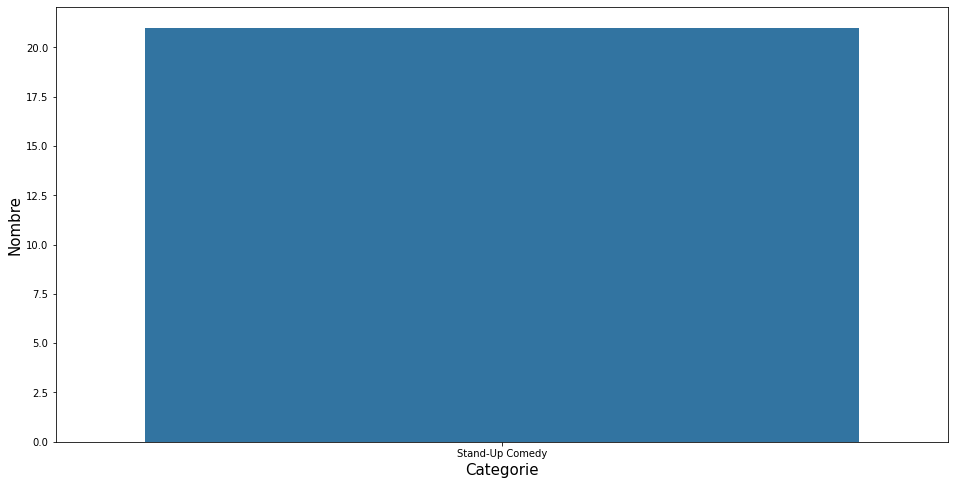

In [7]:
plt.figure(figsize=[16,8])

sns.countplot(x="category_name" ,data=dataCategories, order = dataCategories['category_name'].value_counts().keys())
plt.xlabel("Categorie",fontsize=15)
plt.ylabel("Nombre",fontsize=15)
plt.savefig("img/charts/graphiqueCategories.jpg", dpi = 80, format="jpg")

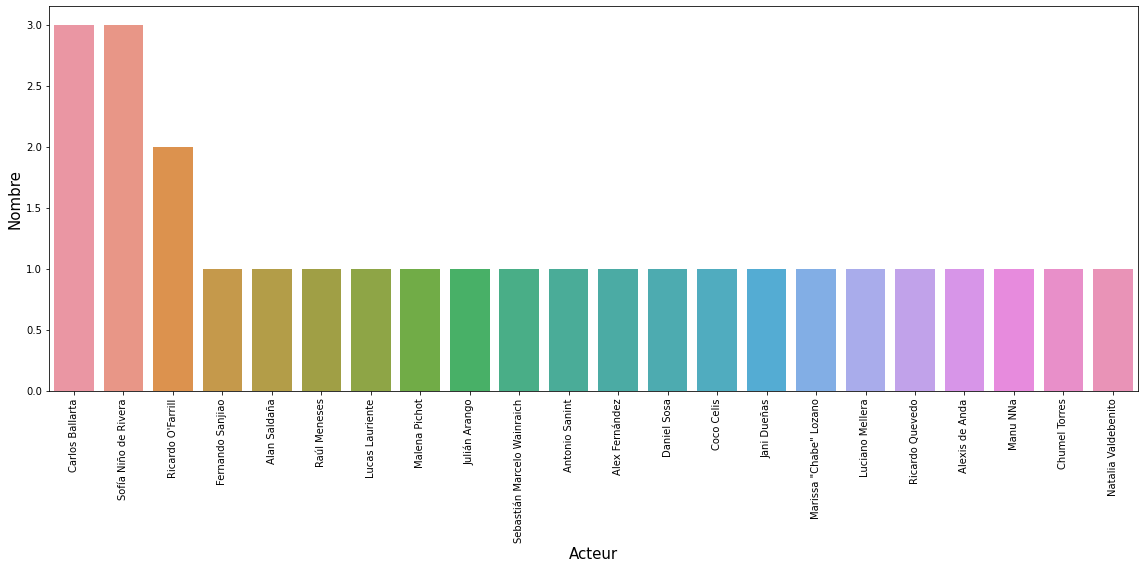

In [8]:
dataActeurs = dataRealisateur[["title", "actor_name"]]
dataActeurs = dataActeurs.drop_duplicates()

plt.figure(figsize=[16,8])
sns.countplot(x="actor_name" ,data=dataActeurs, order = dataActeurs['actor_name'].value_counts().keys())
plt.xlabel("Acteur",fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Nombre",fontsize=15)
plt.tight_layout()
plt.savefig("img/charts/graphiqueActeurs.jpg", dpi = 80, format="jpg")

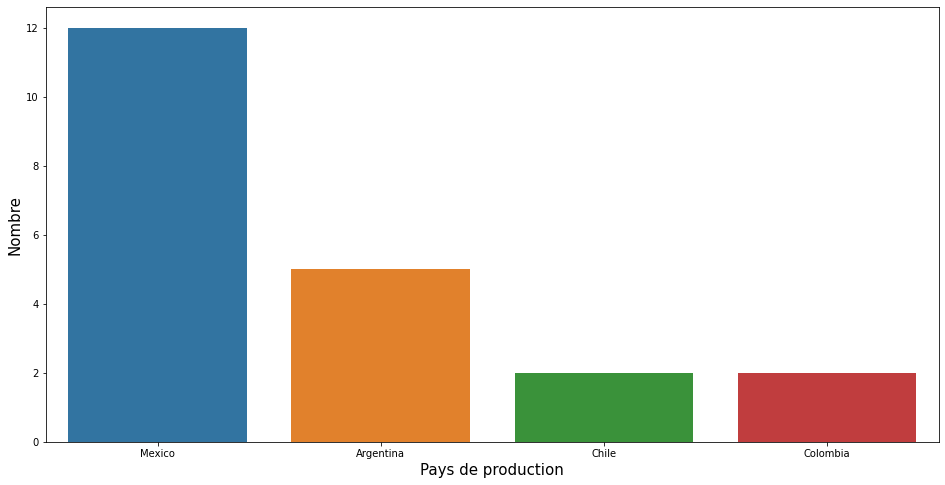

In [9]:
dataPays = dataRealisateur[["title", "country_name"]]
dataPays = dataPays.drop_duplicates()

plt.figure(figsize=[16,8])
sns.countplot(x="country_name", data=dataPays, order = dataPays['country_name'].value_counts().keys())
plt.xlabel("Pays de production",fontsize=15)
plt.ylabel("Nombre",fontsize=15)
plt.savefig("img/charts/graphiquePays.jpg", dpi = 80, format="jpg")

In [10]:
dataFilms = dataRealisateur[["title", "release_year"]]
dataFilms = dataFilms.drop_duplicates().sort_values(by=['release_year']).reset_index(drop=True)
dataFilms

,title,release_year
0,Ricardo O'Farrill Abrazo Genial,2016
1,Sofía Niño de Rivera: Exposed,2016
2,Carlos Ballarta: El amor es de putos,2016
3,Ricardo O'Farrill: Abrazo navideño,2016
4,Alan Saldaña: Mi vida de pobre,2017
5,Daniel Sosa: Sosafado,2017
6,Simplemente Manu NNa,2017
7,Mea Culpa,2017
8,"El Especial de Alex Fernández, el Especial",2017
9,Fernando Sanjiao: Hombre,2018


In [11]:
TMPL_DIR = "template"
fichier = "index.jinja"

templateloader = FileSystemLoader(searchpath=TMPL_DIR)
templateEnv = Environment(loader = templateloader)
template = templateEnv.get_template(fichier)

data = {
            'nom': realisateur,
            'temps': datetime.datetime.now().strftime("%d/%m/%Y"),
            'films' : dataFilms
}
print(template.render(data))


ortfolio-caption-heading">Acteur</div>
                                <div class="portfolio-caption-subheading text-muted">Nombre de films par acteur</div>
                            </div>
                        </div>
                    </div>
                    <div class="col-lg-4 col-sm-6 mb-4">
                        <div class="portfolio-item">
                            <a class="portfolio-link" data-toggle="modal" href="#portfolioModal3">
                                <div class="portfolio-hover">
                                    <div class="portfolio-hover-content"><i class="fas fa-plus fa-3x"></i></div>
                                </div>
                                <img class="img-fluid" src="img/charts/graphiquePays.jpg" alt="" />
                            </a>
                            <div class="portfolio-caption">
                                <div class="portfolio-caption-heading">Pays</div>
                                <div class="portfoli

In [12]:
outputText = template.render(data)
html_file = open('index.html', 'wb')
html_file.write(outputText.encode('utf-8'))
html_file.close()